## Use a text-to-image model to generate a picture of your choice!


In [1]:
#@title This cell downloads and installs all the required software packages and loads the model.
%%capture
!nvidia-smi
!pip install diffusers
!pip install transformers scipy ftfy accelerate

from diffusers import StableDiffusionPipeline
import torch

model_id = "XpucT/Deliberate"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe = pipe.to("cuda")

## Nachfolgend kannst du der KI Anweisungen geben wie Sie dein Wunschbild zu zeichnen hat. Dafür haben wir ein paar Vorlagen vorbereitet, falls du etwas Inspiration brauchst. Du kannst aber auch einfach ohne Vorlage mit dem Modell herumspielen.

### Hint 1: 
****
Write your prompt using keywords and separate them using commas.

**Example:** "superhero, time-travel, teenager, cool"

  0%|          | 0/75 [00:00<?, ?it/s]

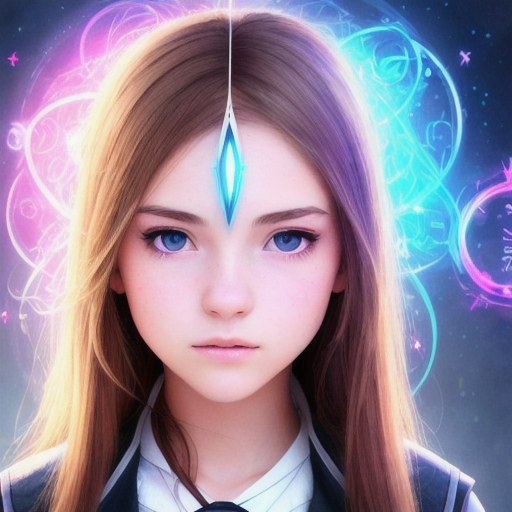

In [ ]:
# @title Template 1: Superhero-Avatar

superpower = "" #@param {type:"string"}
art_style = "" #@param {type:"string"}

positive_quality_insurance_keywords = "High resolution, Precise focus, Well-defined details, Clean composition, Consistent lighting"
negative_quality_insurance_keywords = "superman, duplicate, bad face, bad eyes, bad hands, bad anatomy, missing fingers, cropped, mutated hands, extra fingers, black and white"

avatar_template = "teenager girl, super power, drawing, artwork, fantasy hero character portrait"

concatenated_prompt = f"{positive_quality_insurance_keywords}"
concatenated_negative_prompt = f"{negative_quality_insurance_keywords}"

pipe.safety_checker = lambda images, clip_input: (images, False)
image = pipe(prompt=f"{superpower}, {art_style}, {avatar_template}, {positive_quality_insurance_keywords}",
             negative_prompt=negative_quality_insurance_keywords, 
             callback_steps=75, num_inference_steps=75, guidance_scale=6.5).images[0]    
image

  0%|          | 0/75 [00:00<?, ?it/s]

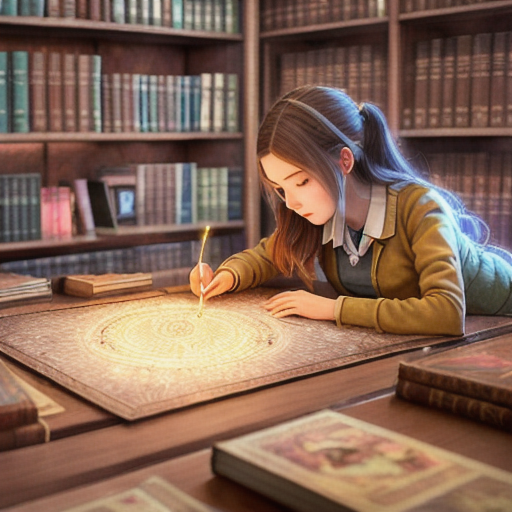

In [ ]:
# @title Template 2: Birthplace of the superhero
setting = "" #@param {type:"string"}
art_style = "" #@param {type:"string"}

positive_quality_insurance_keywords = "High resolution, Precise focus, Well-defined details, Clean composition, Consistent lighting"
negative_quality_insurance_keywords = "superman, duplicate, bad face, bad eyes, bad hands, bad anatomy, missing fingers, cropped, mutated hands, extra fingers, black and white"

birthplace_template = "origin story, super power, 3d scene, teenager girl, drawing, artwork"

concatenated_prompt = f"{positive_quality_insurance_keywords}"
concatenated_negative_prompt = f"{negative_quality_insurance_keywords}"

pipe.safety_checker = lambda images, clip_input: (images, False)
image = pipe(prompt=f"{setting}, {birthplace_template}, {art_style}, {positive_quality_insurance_keywords}",
             negative_prompt=negative_quality_insurance_keywords, 
             callback_steps=75, num_inference_steps=75, guidance_scale=6.5).images[0]    
image

  0%|          | 0/75 [00:00<?, ?it/s]

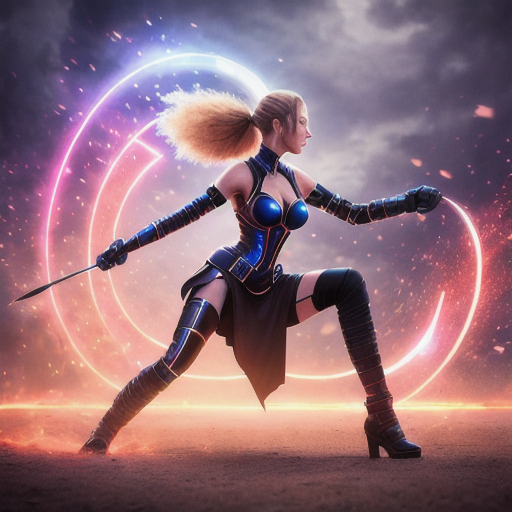

In [ ]:
# @title Template 3: Encounter with the arch nemesis

setting = "" #@param {type:"string"}
art_style = "" #@param {type:"string"}

positive_quality_insurance_keywords = "High resolution, Precise focus, Well-defined details, Clean composition, Consistent lighting"
negative_quality_insurance_keywords = "superman, duplicate, bad face, bad eyes, bad hands, bad anatomy, missing fingers, cropped, mutated hands, extra fingers, black and white"

nemesis_template = "arch nemesis, superhero, fight, epic battle, faceoff"

concatenated_prompt = f"{positive_quality_insurance_keywords}"
concatenated_negative_prompt = f"{negative_quality_insurance_keywords}"

pipe.safety_checker = lambda images, clip_input: (images, False)
image = pipe(prompt=f"{setting}, {nemesis_template}, {art_style}, {positive_quality_insurance_keywords}",
             negative_prompt=negative_quality_insurance_keywords, 
             callback_steps=75, num_inference_steps=75, guidance_scale=6.5).images[0]    
image

  0%|          | 0/75 [00:00<?, ?it/s]

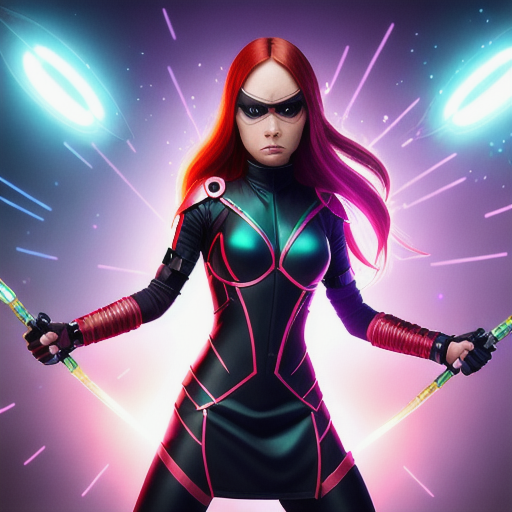

In [ ]:
# @title No Template - Use your imagination!

prompt = "" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
guidance_scale = 12 #@param {type:"slider", min:5, max: 15, step: 0.5}

positive_quality_insurance_keywords = "High resolution, Precise focus, Well-defined details, Clean composition, Consistent lighting"
negative_quality_insurance_keywords = "superman, sexualisation, duplicate, bad face, bad eyes, bad hands, bad anatomy, missing fingers, cropped, mutated hands, extra fingers, black and white, lowres, error, cropped, worst quality, low quality, jpeg artifacts, out of frame, watermark, signature"

concatenated_prompt = f"{prompt}, {positive_quality_insurance_keywords}"
concatenated_negative_prompt = f"{negative_prompt}, {negative_quality_insurance_keywords}"

pipe.safety_checker = lambda images, clip_input: (images, False)
image = pipe(prompt=f"{setting}, {nemesis_template}, {art_style}, {positive_quality_insurance_keywords}",
             negative_prompt=negative_quality_insurance_keywords, 
             callback_steps=75, num_inference_steps=75, guidance_scale=guidance_scale).images[0]    
image

## Advanced Usage

Previously the image generation was always "random", even if your prompt was the same for each generation process.
In the next part you can "fix" the basic structure of the image, to reproduce the same image, given the same prompt.

But if you alter the prompt slightly, you generate a different image, which looks similar to the basic structure of the previous image,

Utilizing this method you can generate an image, of which you like the basic structure, but can perfect by adapting the prompt further.

<ipython-input-6-0d89ef9df9de>:36: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, pipe.unet.in_channels, height // 8, width // 8),


  0%|          | 0/50 [00:00<?, ?it/s]

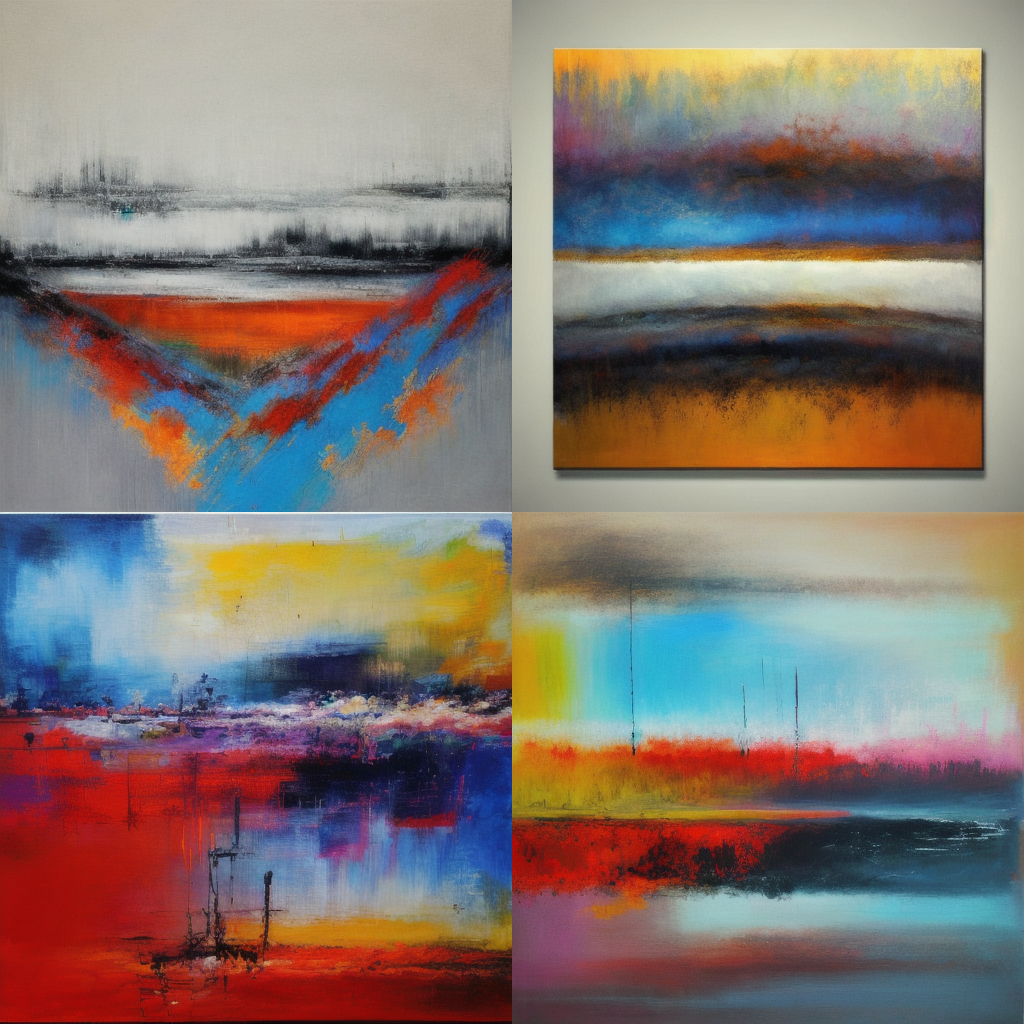

In [ ]:
# @title Run this cell, untill you like the basic structure of an image.

num_images = 4 
deterministic_prompt = "abstract art, landscape" # @param {type:"string"}
deterministic_negative_prompt = "" # @param {type:"string"}
guidance_scale = 12 #@param {type:"slider", min:5, max: 15, step: 0.5}

from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


height = pipe.unet.config.sample_size * pipe.vae_scale_factor
width = pipe.unet.config.sample_size * pipe.vae_scale_factor
device = "cuda"
generator = torch.Generator(device=device)

latents = None
seeds = []
for _ in range(num_images):
    # Get a new random seed, store it and use it as the generator state
    seed = generator.seed()
    seeds.append(seed)
    generator = generator.manual_seed(seed)
    
    image_latents = torch.randn(
        (1, pipe.unet.in_channels, height // 8, width // 8),
        generator = generator,
        device = device
    )
    latents = image_latents if latents is None else torch.cat((latents, image_latents))
    
# latents should have shape (4, 4, 64, 64) in this case
# latents.shape

with torch.autocast(device):
    images = pipe(
        [deterministic_prompt] * num_images,
        guidance_scale=7.5,
        latents = latents,
    )["images"]

image_grid(images, 2, 2)

## Then select an image, of which you liked the basic structure.
****
The images are numbered as follows:

**0 1**

**2 3**

In [ ]:
# @title Choose the iimage you liked the most!

picture = 0 # @param {type:"number"}

seed = seeds[picture]   # Second one
seed

generator.manual_seed(seed)

latents = torch.randn(
    (1, pipe.unet.in_channels, height // 8, width // 8),
    generator = generator,
    device = device
)

In [ ]:
# @title Adapt the image you selected!

prompt = "" # @param {type:"string"}
negative_prompt = "" # @param {type:"string"}

with torch.autocast("cuda"):
    image = pipe(
        [prompt] * 1,
        negative_prompt=[negative_prompt] * 1,
        guidance_scale=7.5,
        latents = latents,
    )["sample"]
    
image[0]